In [ ]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/CIS-5450/Project/Crime-in-LA"

/content/drive/MyDrive/Colab Notebooks/CIS-5450/Project/Crime-in-LA


In [ ]:
# Loading the data
crime_data_df = pd.read_csv("Crime_Data_2010_2017.csv")

In [ ]:
# Dataset columns
crime_data_df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

Crime in LA dataset is special because it has valuable information on the victim profiles. Hence, we will specifically focus on analyses using this information.

In [ ]:
crime_data_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


#Geo-Spatial distribution of crime across LA
Let's start by looking at the geo-spatial distribution of crime in LA. This is a good indicator of hotpots and crime heavy areas in the city, that you just might need to be a little more cautious in. 

In [ ]:
# Get columns relevant for Heatmap
heatmap_data = crime_data_df[['Location ']].rename(columns={'Location ': 'Location'})
heatmap_data.dropna(inplace=True)

In [ ]:
# Convert Location string to a tuple of Latitutde and Longitude
def str_to_tuple(tup):
  return_tup = tuple(float(x) for x in tup.strip('()').split(','))
  return return_tup

In [ ]:
# Heatmap of 50000 randomly sampled crime counts from around the city
heatmap_data['Location'] = heatmap_data['Location'].apply(str_to_tuple)
avg_lat = heatmap_data['Location'].apply(lambda x: x[0]).mean()
avg_long = heatmap_data['Location'].apply(lambda x: x[1]).mean()
crime_map = folium.Map(location=[avg_lat, avg_long], 
                       zoom_start = 10,
                       tiles = "Stamen Toner")
from folium.plugins import HeatMap

HeatMap(heatmap_data.sample(50000), radius=10).add_to(crime_map)
crime_map

As we feel might be a general trend, LA downtown is a hotspot of crime in LA. However, a lot of these might just be petty or small. We can clearly see this in the top 10 most frequent crimes. 

#Most Frequent Crimes

In [ ]:
top10_crime_codes = pd.DataFrame(crime_data_df['Crime Code Description'].value_counts()[:10]).reset_index().rename(columns={'index': 'Crime Code Description', 'Crime Code Description': 'counts'})

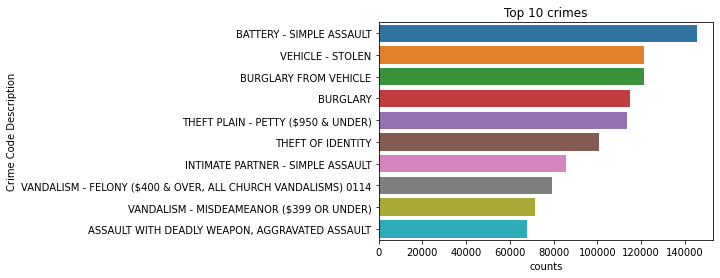

In [ ]:
sns.barplot(data=top10_crime_codes, y='Crime Code Description', x='counts')
title = plt.title('Top 10 crimes')

As we can see, Battery and Assault are the most common which mostly mainfest as physical violence from altercations. We will notice some changes as we filter the top 10 most frequent crimes across victim profiles.

In [ ]:
top10_crime_codes_M = crime_data_df[crime_data_df['Victim Sex'] == 'M']['Crime Code Description'].value_counts()[:10].reset_index().rename(columns={'index': 'Crime Code Description', 'Crime Code Description': 'counts'})

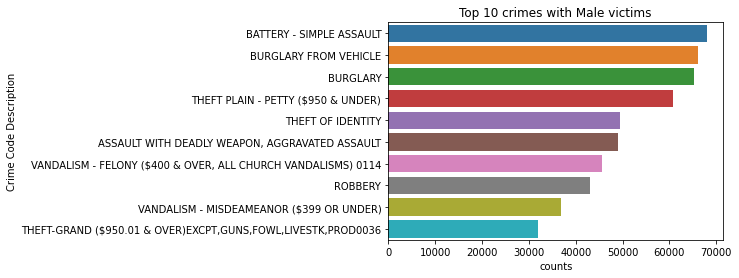

In [ ]:
sns.barplot(data=top10_crime_codes_M, y='Crime Code Description', x='counts')
title = plt.title('Top 10 crimes with Male victims')

The top 10 crimes for Males is pretty much the same with Intimate Partner violence and crimes of Sexual Natures missing. Another interesting to note is that for males, 'Assault with deadly weapons' is ahead possibly hinting that they are more likely to be assualted with weapons. 

In [ ]:
top10_crime_codes_F = crime_data_df[crime_data_df['Victim Sex'] == 'F']['Crime Code Description'].value_counts()[:10].reset_index().rename(columns={'index': 'Crime Code Description', 'Crime Code Description': 'counts'})

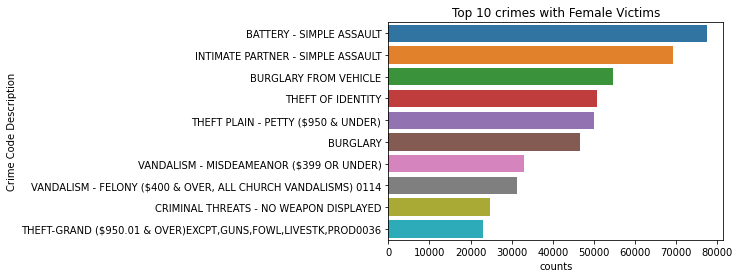

In [ ]:
sns.barplot(data=top10_crime_codes_F, y='Crime Code Description', x='counts')
title = plt.title("Top 10 crimes with Female Victims")

Top 10 crimes for Females differs in the way that it has Intimate Partner/Sexual Violence among the top 2. And does not have 'Assualt with deadly weapons' in the top 10 which is in agreement of our earlier observation.

We will later see how this distribution has an effect on how quickly victims report the crimes.

#Gun Violence and Homicide

We start this analysis by looking at the geo-spatial distribution of all homicides in LA. We will try to explain and correlate on how this distribution looks like.

In [ ]:
# Homicides
homicides_df = crime_data_df[crime_data_df['Crime Code Description'] == 'CRIMINAL HOMICIDE']

In [ ]:
heatmap_data = homicides_df[['Location ']].rename(columns={'Location ': 'Location'})
heatmap_data.dropna(inplace=True)

In [ ]:
heatmap_data['Location'] = heatmap_data['Location'].apply(str_to_tuple)
avg_lat = heatmap_data['Location'].apply(lambda x: x[0]).mean()
avg_long = heatmap_data['Location'].apply(lambda x: x[1]).mean()
crime_map = folium.Map(location=[avg_lat, avg_long], 
                       zoom_start = 10,
                       tiles = "Stamen Toner")
from folium.plugins import HeatMap

HeatMap(heatmap_data, radius=10).add_to(crime_map)
crime_map

As we can see the hotspot for homicides are not really in the busy downtown area. It seems the Firestone Boulevard and South Broadway area has something special about it. We will go on to analyse further on what and how violent crimes happen in LA.

Let's digress a bit on what weapons people mostly use to commit crimes. Here are the top 10 weapons used for crime in LA

In [ ]:
top_weapons = crime_data_df['Weapon Description'].value_counts()[:10].reset_index().rename(columns={'index': 'Weapon', 'Weapon Description': 'counts'})

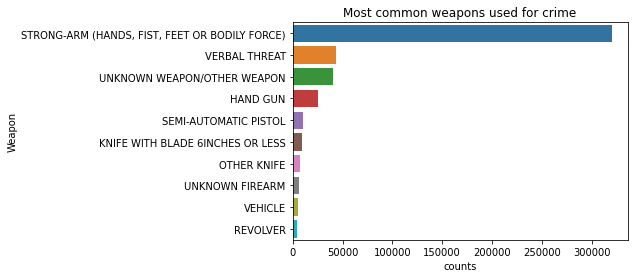

In [ ]:
sns.barplot(data=top_weapons, y='Weapon', x='counts')
title = plt.title("Most common weapons used for crime")

This seems expected, as we saw the distribution of the type of crimes earlier. Petty crimes or even physical altercations will usually not involve other weapons. However, it is still somewhat concerning to find guns in the top 5, even above more obvious choices of weapons such as knives.

Now let us go back to analysing homocides and look at what are the top 10 weapons used for committing homicide.

In [ ]:
homicide_weapons = homicides_df['Weapon Description'].value_counts()[:10].reset_index().rename(columns={'index': 'Weapon', 'Weapon Description': 'counts'})

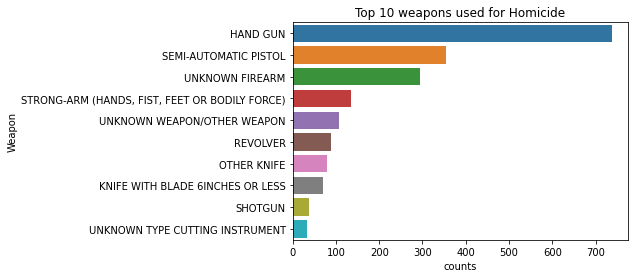

In [ ]:
sns.barplot(data=homicide_weapons, y='Weapon', x='counts')
title = plt.title('Top 10 weapons used for Homicide')

As we can see guns are the most commonly used weapons to commit homicide in LA, which is not somewhat of a groundbreaking discovery in this analysis. However, it is still somwehat intriguing to find the correlation between them. The US has continuously been divided under the premise of gun control, and the above statistic can be interpreted as why this discussion is so important. In relevance, let's look at a statistic published by [ECONOFACT](https://econofact.org/gun-violence-in-the-u-s):

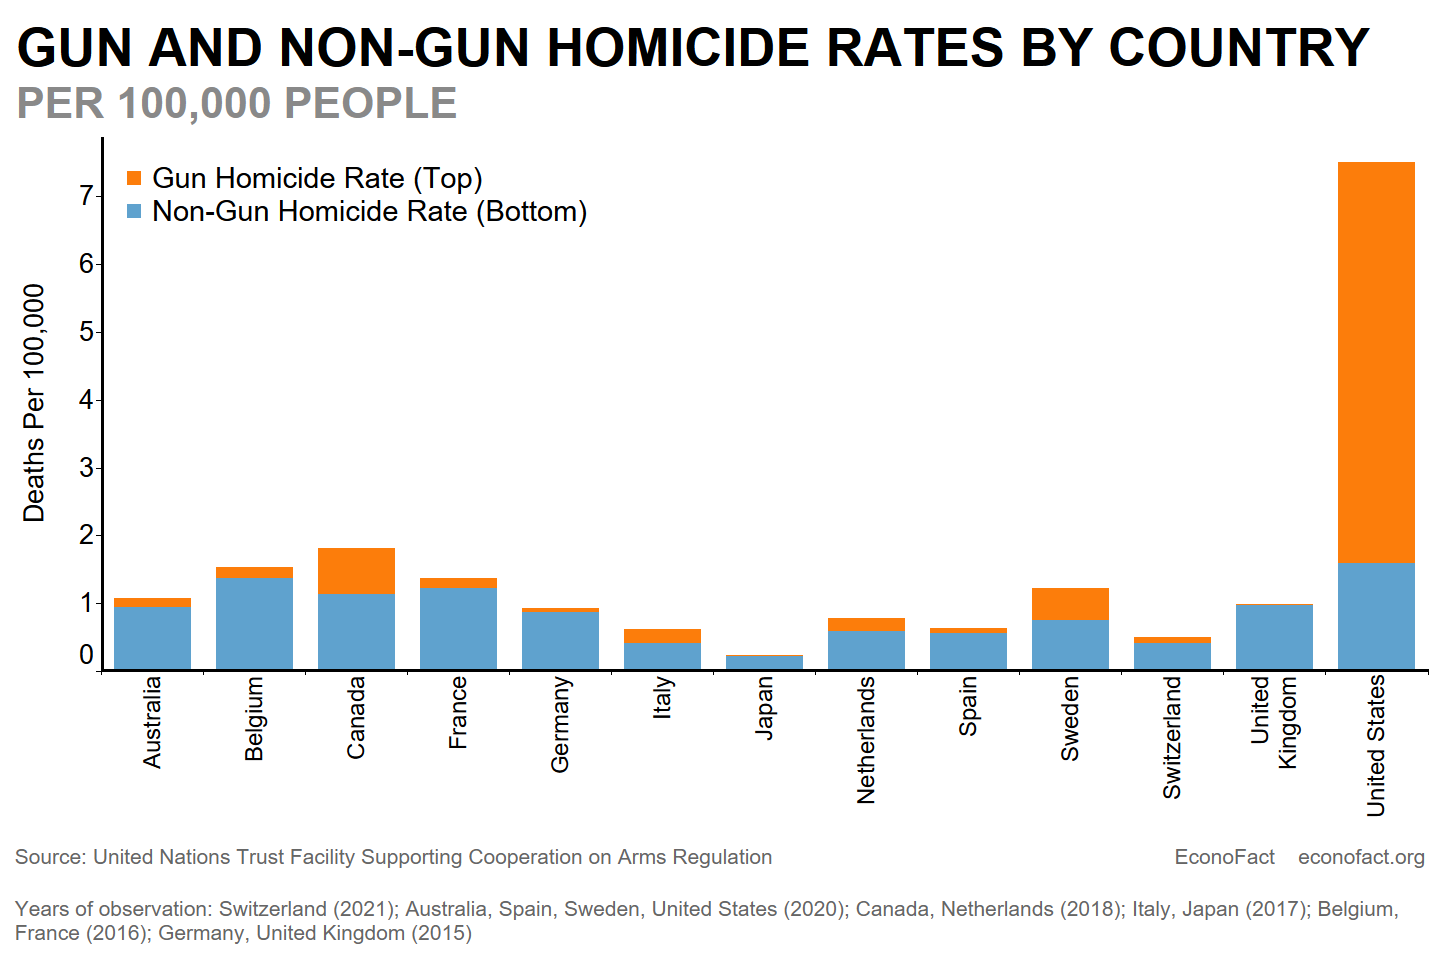

Clearly, this is not a trend observed in countries with stricter gun laws. To give more context, "A knife is the most common murder weapon and was used in 29 per cent of homicides in England and Wales last year. By contrast a gun is used only about nine per cent of homicides in England and Wales" - [Independent-UK](https://www.independent.co.uk/news/uk/crime/scourge-of-the-most-common-murder-weapon-478909.html)

To further investigate this, we will now discuss the role of guns in violent crime in LA.

In [ ]:
# All unique weapons used in crime in LA
print(crime_data_df['Weapon Description'].unique())

['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)' nan
 'UNKNOWN WEAPON/OTHER WEAPON' 'OTHER KNIFE' 'BOTTLE' 'VERBAL THREAT'
 'CLEAVER' 'FOLDING KNIFE' 'BELT FLAILING INSTRUMENT/CHAIN'
 'KNIFE WITH BLADE 6INCHES OR LESS' 'BLUNT INSTRUMENT' 'PHYSICAL PRESENCE'
 'BOMB THREAT' 'SCREWDRIVER' 'MACE/PEPPER SPRAY' 'ROPE/LIGATURE'
 'KITCHEN KNIFE' 'REVOLVER' 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH'
 'ROCK/THROWN OBJECT' 'HAND GUN' 'RAZOR BLADE' 'PIPE/METAL PIPE'
 'OTHER CUTTING INSTRUMENT' 'UNKNOWN FIREARM' 'STICK' 'CLUB/BAT'
 'SEMI-AUTOMATIC PISTOL' 'UNKNOWN TYPE CUTTING INSTRUMENT' 'BOARD'
 'CONCRETE BLOCK/BRICK' 'AIR PISTOL/REVOLVER/RIFLE/BB GUN' 'SCISSORS'
 'TIRE IRON' 'SCALDING LIQUID' 'SIMULATED GUN' 'VEHICLE' 'SWITCH BLADE'
 'MACHETE' 'OTHER FIREARM' 'RIFLE' 'BOWIE KNIFE' 'SHOTGUN' 'TOY GUN'
 'SYRINGE' 'DIRK/DAGGER' 'CAUSTIC CHEMICAL/POISON' 'RELIC FIREARM' 'RAZOR'
 'FIRE' 'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE' 'HAMMER'
 'STUN GUN' 'FIXED OBJECT' 'ICE PICK' 'DEMAND NOTE'
 'AUT

To do this analysis, we looked at all the unique weapons that are used in LA to commit crime and from them filtered out the ones that describe or indicate guns.

In [ ]:
# The list of guns from all the unique values from the Weapon description column
gun_list = ['REVOLVER', 'HAND GUN', 'UNKNOWN FIREARM', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'OTHER FIREARM', 'RIFLE',
            'SHOTGUN', 'TOY GUN', 'RELIC FIREARM', 'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE', 'AUTOMATIC WEAPON/SUB-MACHINE GUN',
            'UZI SEMIAUTOMATIC ASSAULT RIFLE', 'SAWED OFF RIFLE/SHOTGUN', 'HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE',
            'M-14 SEMIAUTOMATIC ASSAULT RIFLE', 'STARTER PISTOL/REVOLVER', 'UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE',
            'ASSAULT WEAPON/UZI/AK47/ETC', 'SEMI-AUTOMATIC RIFLE', 'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON', 'ANTIQUE FIREARM',
            'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON', 'M1-1 SEMIAUTOMATIC ASSAULT RIFLE']

In [ ]:
# Crimes that involve guns i.e. weapons from the above list
crime_with_guns = crime_data_df[crime_data_df['Weapon Description'].apply(lambda x: x in gun_list)]

In [ ]:
crime_code_with_guns = crime_with_guns['Crime Code Description'].value_counts()[:10].reset_index().rename(columns={'index': 'Crime Code Description', 'Crime Code Description': 'counts'})

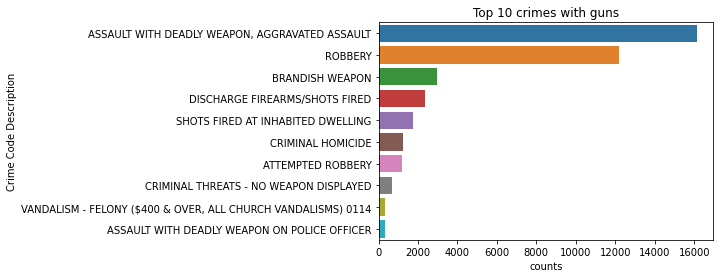

In [ ]:
# Analysing top 10 crime with guns
sns.barplot(data=crime_code_with_guns, y='Crime Code Description', x='counts')
title = plt.title('Top 10 crimes with guns')

This obviously looks different from the top 10 crimes committed overall that we looked at earlier. The crimes seem somewhat more dangerous, we have more robberies instead of burgalaries, more dangerous assaults and also have criminical homicide in here now.

Now, let us analyze the geo-spatial distribution of gun related crimes in LA. This might be a very indirect but interesting way of correlating observations.

In [ ]:
# Heatmap of crimes related to guns
heatmap_data = crime_with_guns[['Location ']].rename(columns={'Location ': 'Location'})
heatmap_data.dropna(inplace=True)

In [ ]:
heatmap_data['Location'] = heatmap_data['Location'].apply(str_to_tuple)
avg_lat = heatmap_data['Location'].apply(lambda x: x[0]).mean()
avg_long = heatmap_data['Location'].apply(lambda x: x[1]).mean()
crime_map = folium.Map(location=[avg_lat, avg_long], 
                       zoom_start = 10,
                       tiles = "Stamen Toner")
from folium.plugins import HeatMap

HeatMap(heatmap_data[:50000], radius=10).add_to(crime_map)
crime_map

Surprisingly or not so surprisingly, the hotspot is almost exactly where the most homocides in LA are located. It's evident that guns and homocides are correlated atleast spatially!

This analysis raises important questions which, although are already being discussed heavily, definitely need to addressed and tackled head on. 

How should we address this as a problem? Stricter gun laws? 
At the very least, we definitely need to do something about guns in areas with high homicide rates as we saw in our analysis above. 

#Analysing $δT$ for a reported crime: Victim Profiles

We define: $\delta T = T_{report} - T_{occurence}$ 

We feel $δt$ is a good indicator of vigilance and availibilty of law enforcement. At the same time, it also determines how effective the investigation will be as a lot of evidence is lost as time passes by.

We will look at how this variable varies across victim profiles as well as how much it effects the outcome of an investigation.

In [ ]:
# Next we will analyze the delta-report = Date Reported - Date occurred of crime records and their variations with Sex/Age
crime_reporting_data = crime_data_df[['Date Reported', 'Date Occurred', 'Victim Age', 'Victim Sex', 'Status Description']]
crime_reporting_data.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# Calculating Delta-reported 
crime_reporting_data['Date Occurred'] = pd.to_datetime(crime_reporting_data['Date Occurred'])
crime_reporting_data['Date Reported'] = pd.to_datetime(crime_reporting_data['Date Reported'])
crime_reporting_data['Days-to-report'] = (crime_reporting_data['Date Reported'] - crime_reporting_data['Date Occurred']).apply(lambda x: x.days)

In [ ]:
crime_delta_counts = crime_reporting_data[['Days-to-report']]
crime_delta_counts['counts'] = 1
crime_delta_counts = crime_delta_counts.groupby('Days-to-report').sum().reset_index()

In [ ]:
# The probability mass distribution of reporting
crime_delta_counts['counts'] = crime_delta_counts['counts'] / crime_delta_counts['counts'].sum()

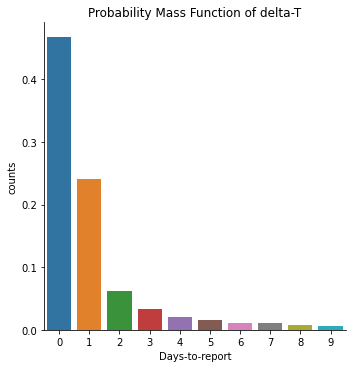

In [ ]:
# Histogram like plot for delta-t
sns.catplot(data=crime_delta_counts[:10], x='Days-to-report', y='counts', kind='bar')
title = plt.title("Probability Mass Function of delta-T")

This looks like a geometric distribution but actually falls much differs a lot. It falls much faster early on yet has relatively higher probabilities towards the end. 

This shows that most crimes are reported almost immediately. Especially petty crimes and those immediately observed or witnessed. However, it is still complicated. Crimes of sexual nature or intimate partner violence or assaults are expected to take a lot longer to be reported. 

In [ ]:
# Average time it takes for a person to report a crime
mean_delta_t = crime_reporting_data['Days-to-report'].mean()
print("Average number of days to report a crime:", round(mean_delta_t, 2))

Average number of days to report a crime: 17.3


This shows that there are a lot of crimes that either go unnoticed or are very difficult for the victims to report. 

We get somewhat of an interesting insight when we try to see how the average delta-t 

In [ ]:
crime_reporting_by_age = crime_reporting_data[['Victim Age', 'Days-to-report']].groupby(by='Victim Age').mean().reset_index()

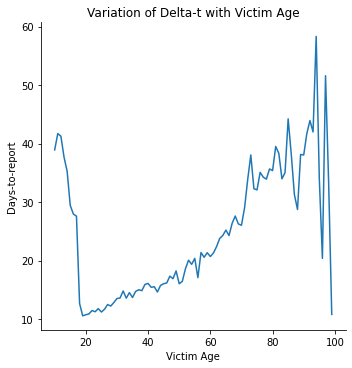

In [ ]:
sns.relplot(data=crime_reporting_by_age, x='Victim Age', y='Days-to-report', kind='line')
title = plt.title("Variation of Delta-t with Victim Age")

The above plot is weirdly interesting. It seems young people and kids in general have more difficulty report crimes againts them on time. We will try not to go into the psychology of this problem but there can be multiple reasons for this. This is also somewhat similar for old people. 

On the other hand, it's weird why delta-t increases for victims of the age 20-60. 

In [ ]:
crime_delta_counts_F = crime_reporting_data[crime_reporting_data['Victim Sex'] == 'F'][['Days-to-report']]

In [ ]:
crime_delta_counts_M = crime_reporting_data[crime_reporting_data['Victim Sex'] == 'M'][['Days-to-report']]

Let's see on average how long it takes for male and female victims to report a crime and see if there is a trend.

In [ ]:
print("Average time taken to report when the victims are female:", round(crime_delta_counts_F['Days-to-report'].mean(), 2))

Average time taken to report when the victims are female: 19.63


In [ ]:
print("Average time taken to report when the victims are Male:", round(crime_delta_counts_M['Days-to-report'].mean(), 2))

Average time taken to report when the victims are Male: 15.09


On average, females take longer to report a crime than males. This is explainable as in the top 10 crimes against females we saw more crimes against them of intimate nature. There might as well be other reasons for this though. 

However, to ensure, let's test this hypothesis!

In [ ]:
# Number of samples available
len(crime_delta_counts_M), len(crime_delta_counts_F)

(663090, 660449)

In [ ]:
# Sample 600000 points to run t-test on
crime_delta_counts_F_samples = crime_delta_counts_F.sample(600000, replace=True)
crime_delta_counts_M_samples = crime_delta_counts_M.sample(600000, replace=True)

In [ ]:
t_delta, p_delta = ttest_ind(crime_delta_counts_F_samples['Days-to-report'], 
                             crime_delta_counts_M_samples['Days-to-report'],
                             alternative='greater')

In [ ]:
t_delta, p_delta

(25.0956197323913, 3.015951641207986e-139)

We ran a one-sided t-test. The p-value and t-test calculated strictly that the mean of samples from female victims is less than male victims. This results in a near zero p-value. Which means that our hypothesis is very strong and almost impossible to be a fluke given the data.

# Crime Resolution and $\delta T$

Having done the analysis of variation of $\delta T$ with victim profiles, we will look at the realtionship of $\delta t$ with crime resolution. 

Firstly, we will make a dataframe of relevant columns. And then given the unique values of current status of crimes, filter them on whether they have been solved (progressed or made arrests) or not.

In [ ]:
crime_reporting_and_resolved = crime_reporting_data[['Status Description', 'Days-to-report']]

In [ ]:
# Possible status of cases
print(crime_reporting_and_resolved['Status Description'].unique())

# We will remove cases where the status is unknown
crime_reporting_and_resolved = crime_reporting_and_resolved[crime_reporting_and_resolved['Status Description'] != 'UNK']

['Adult Other' 'Invest Cont' 'Adult Arrest' 'Juv Arrest' 'Juv Other' 'UNK']


In [ ]:
# We assume progressed or resolved cases with status 'Invest Cont' to be unresolved
# Otherwise, the case has been resolved and have made progress with arrests
crime_reporting_and_resolved['Resolved'] = crime_reporting_and_resolved['Status Description'].apply(lambda x: 0 if x in ['Invest Cont'] else 1)

In [ ]:
print("Average delta-T for crimes that have been resolved:", round(crime_reporting_and_resolved[crime_reporting_and_resolved['Resolved'] == 1]['Days-to-report'].mean(), 2))

Average delta-T for crimes that have been resolved: 12.01


In [ ]:
print("Average delta-T for crimes that have not been resolved:", round(crime_reporting_and_resolved[crime_reporting_and_resolved['Resolved'] == 0]['Days-to-report'].mean(), 2))

Average delta-T for crimes that have not been resolved: 18.96


Finally, to conclude, we will test this hypothesis as well. 

In [ ]:
resolved = crime_reporting_and_resolved[crime_reporting_and_resolved['Resolved'] == 1]
unresolved = crime_reporting_and_resolved[crime_reporting_and_resolved['Resolved'] == 0]

In [ ]:
len(resolved), len(unresolved)

(318525, 1012013)

We see that we have much less resolved cases than unresolved cases. We will sample 300000 data samples from both of them. 

In [ ]:
# Sample 600000 points to run t-test on
resolved_samples = resolved.sample(300000, replace=True)
unresolved_samples = unresolved.sample(300000, replace=True)

We will again do a one-sided t-test to show that the average delta-T is less for cases that have been resolved.

In [ ]:
t_resolution, p_resolution = ttest_ind(resolved_samples['Days-to-report'], unresolved_samples['Days-to-report'],
                                       alternative='less')

In [ ]:
t_resolution, p_resolution

(-27.34330984261695, 8.1894165568809e-165)

Again, a near zero P-value. To be honest, we know these things seem pretty much like common sense but it is always nice to prove them through data and statistics. 

Because of how we have tested, we have to be careful with the hypothesis this signifies.

We claim that, of the cases that are resolved, they were actually reported faster than those that weren't. 

This claim seems almost identical to showing its converse that a case is more likely to be solved if it's reported earlier. However, our hypothesis was not framed this way.

As we know, our claim is only logical as evidence of a crime fades away as time progresses and it's harder to trace the perpetrators. 

# Conclusion

The Crime in LA dataset provided us some interesting insights on victim profiles, the type of crimes committed, weapons used, the role of guns in dangerous crime and homicide, the variation of $\delta T$ with victim profile and its effect on crime resolution. This analysis hopefully contributes a unique aspect to our overall project!